In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

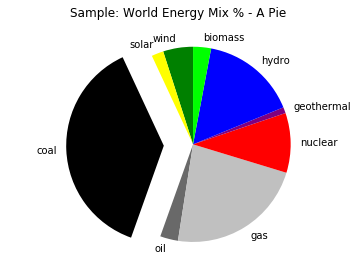

In [141]:
import matplotlib.pyplot as plt

labels = 'wind','solar','coal','oil','gas','nuclear','geothermal','hydro','biomass'
sizes =   [5,      2,      38,    3,  23,        10,       1,       16,     3]
explode = (0.0,    0.0,    0.3, 0.0, 0.0,      0.0,      0.0,      0.0,     0.0) 

colours = {'wind':'green',
            'solar': 'yellow',
           'coal': 'black',
           'oil': 'dimgray',
          'gas':'silver',
          'nuclear':'red',
          'geothermal':'purple',
          'hydro':'blue',
          'biomass':'lime'}

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, 
        shadow=False, startangle=90, colors=[colours[key] for key in labels])
ax1.set_title("Sample: World Energy Mix % - A Pie")
ax1.axis('equal')  
plt.show()

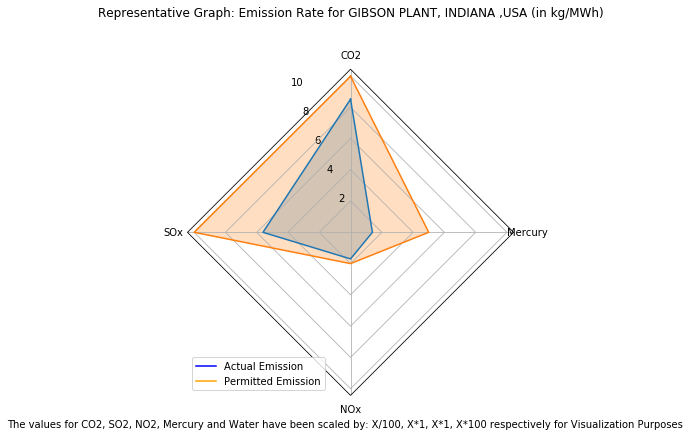

In [121]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import matplotlib.lines as mlines

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# MAIN CODE

data = [['CO2', 'SOx', 'NOx', 'Mercury'],
        ('Representative Graph: Emission Rate for GIBSON PLANT, INDIANA ,USA (in kg/MWh)', [
            [851/100,5.6,1.7,0.014*100],
            [997.9/100,10,2,0.05*100],
            ])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))

ax.set_title(title,  position=(0.5, 1.1), ha='center')
for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
    
blue_line = mlines.Line2D([], [], color='blue', 
                          markersize=15, label='Actual Emission')

orange_line = mlines.Line2D([], [], color='orange', 
                          markersize=15, label='Permitted Emission')
plt.legend(handles=[blue_line, orange_line])

ax.set_varlabels(spoke_labels)
fig.text(.5, .05, 'The values for CO2, SO2, NO2, Mercury and Water have been scaled by: X/100, X*1, X*1, X*100 respectively for Visualization Purposes', ha='center')

plt.show()